# Part 1: EDA using Pandas, Pandas Profiling & SweetViz
___

There are several EDA techniques and visualization libraries such as .info(), .describe(), matplotlib, seaborn to name a few that are invaluable tools for eda. These are the more common libraries we generally utilize. While doing some experimenting on data visualization, I came across other EDA and visualization libraries such as `pandas profiling` and `sweetviz`. Curious, I attempted to find out more about these libraries.

Using the Boston housing dataset from the sci-kit learn package, I explored data using aforementioned libraries followed by pandas profiling and sweetviz for a comparison.

Part1: EDA
- [Check out the data](#Check-out-the-data)
- [EDA](#EDA)
- [Individual pandas functions](#Individual-pandas-functions)
- [Self-defined functions](#Self-defined-functions)
- [Pandas profiling](#Pandas-profiling)
- [Sweetviz](#Sweetviz)

Part2: Linear Regression Model
- [Regression Evaluation Metrics](#Regression-Evaluation-Metrics)

[Part 3: More Feature Selection & Regularized Regression](#Part-3:-More-Feature-Selection-&-Regularized-Regression)
- [Variance inflation factor](#Variance-inflation-factor)

[Part4: Interaction Terms](#Part-4:-Interaction-Terms)


## Check out the data

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
sns.set_context("talk")

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# Data dimension
boston.data.shape
# 506 rows, 13 columns

(506, 13)

In [5]:
# Features
boston.feature_names
# 13 features, matches up with number of columns of data shape
# Need to include target column

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Dataset consist of 506 rows, 13 variables. Target variable to be included into the dataframe.

In [6]:
# Process the data into dataframe
df = pd.DataFrame(boston.data)
# Name the columns
df.columns=boston.feature_names
# Add the target column
df['MEDV'] = boston.target

In [7]:
# First 5 rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA 

In EDA, some of the typically aspects to look out for are missing/ null values, erroneous values, range of values for data cleaning follow-up. The dataset used for this example is clean (from scikit-learn) in the sense that there's no missing values. Let's get down to rest of eda. 

Data dictionary provides context regarding the variables. This is accessed through *boston.DESCR*. Of the 13 variables, `CHAS` and `RAD` are categorical variables, rest are continuous variables.

---

### Individual pandas functions

In [8]:
# Columns & rows, null value count and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
# Summary statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# Unique values of each column in dataframe
for col in df:
    print(f"{col}:{len(df[col].unique().tolist())}")

CRIM:504
ZN:26
INDUS:76
CHAS:2
NOX:81
RM:446
AGE:356
DIS:412
RAD:9
TAX:66
PTRATIO:46
B:357
LSTAT:455
MEDV:229


In [11]:
# Duplicated rows
# Returns all duplicated rows besides the first observed occurrence
dup = df[df.duplicated(keep='first')]
dup

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


### Self-defined functions

In [12]:
# An alternative approach;
# Defined functions for basic eda

def data_explore(df):
    #First two rows
    print("First two rows of data:")
    display(df.head(2))
    print()
    # Print shape of dataframe
    print(f"Shape: {df.shape}")
    print()
    # Print datatypes
    print("Columns & Datatypes: ")
    df.info()
    print()
    # Check for null values
    print("Null values:")
    if df.isnull().values.any() == False:
        print("None in Dataframe.")
    else:
        for col in df:
            print(f"{col}:{df[col].isnull().sum()}")
    print()
    # Count of distinct values
    print("Unique values (by Columns)")
    for col in df:
        print(f"{col}:{len(df[col].unique().tolist())}")
    print()
    # Inform if there are duplicates, if any
    if df.duplicated(subset=None, keep='first').any() == False:
      print("No duplicates present.")
    else:
        dup = df[df.duplicated(subset=None, keep='first')]
        print(f"{len(dup)} duplicates in {len(df)} rows.")

In [13]:
data_explore(df)

First two rows of data:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6



Shape: (506, 14)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB

Null values:
None in Dataframe.

Unique values (by Columns)
CRIM:504
ZN:26
INDUS:76
CHAS:2
NOX:81
RM:446
AGE:356
DIS:412
RAD:9
TAX:66
PTRATIO:46
B:357
LSTAT:455
MEDV:229

No duplicates present.


**Observations:** No negative values observed. Significant intervals between 

- 75% and max percentile for variable(s): `CRIM`, `ZN`
- 50% and 75% percentile for variable(s): `RAD`
- 0% and 25% percentile for variable(s): `B`

Cross referencing the data dictionary, we can derive a better understanding:
- `CRIM`: crime rate generally low for most towns.
- `ZN`: low proportion of residential land allocated for lots over 25,000 sq.ft
- `RAD`: small concentration of residential housing situated near highways (high accessibility to highways).
- `B`: small concentration of residential housing areas with low blacks population. 
- `RM` : average rooms per dwelling is not a whole number consistently for entire dataset. Likely a feature than a bug.

## Visualizations

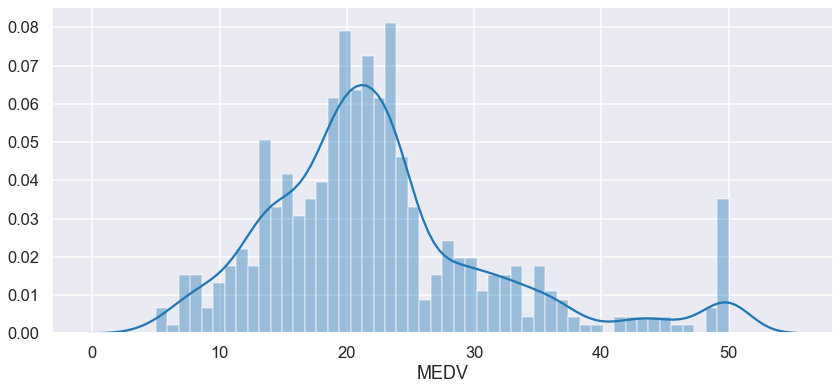

In [14]:
# Visualize Target variable (is it a normal distribution?)
fig = plt.figure(figsize=(14, 6))
sns.distplot(df['MEDV'],bins=50);

**observation**: Target variable is normally distributed, with slight right skew. 

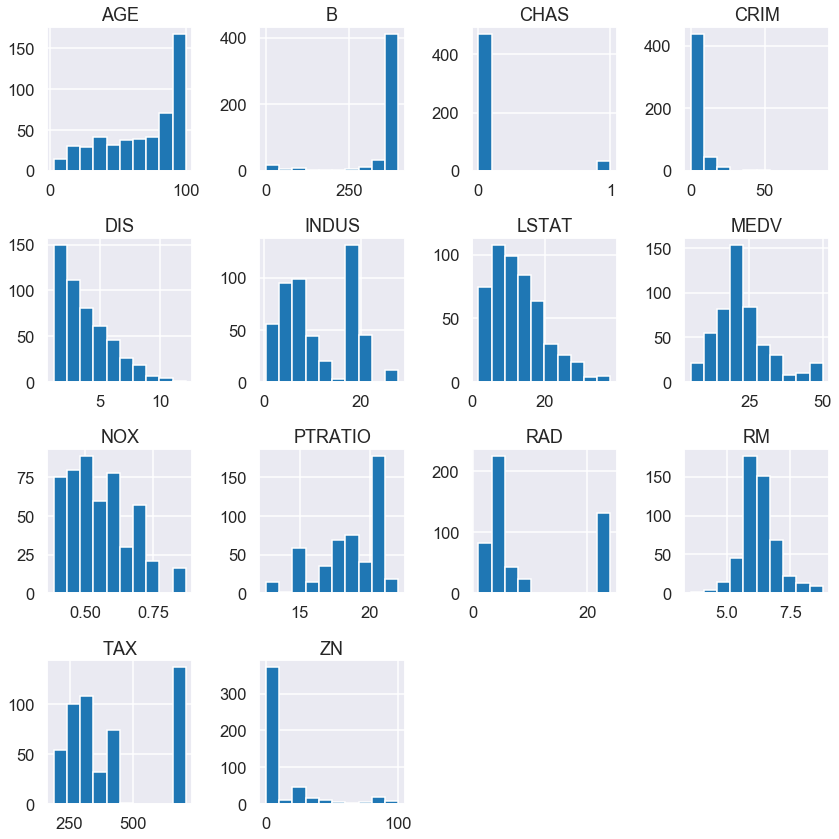

In [15]:
# Distributions of variables
"""Set grid to True to improve interpretability of histogram"""
df.hist(figsize=(12,12), grid=True)
plt.tight_layout();

It appears there a number of outliers from the above boxplot. Check out the rest of the variables.

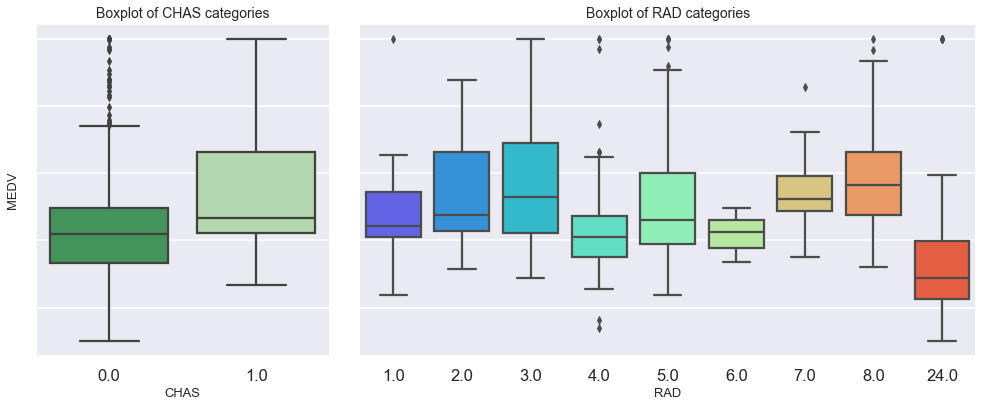

In [16]:
# Visualize variance of catergorical variables wrt. Target variable
gridsize = (1, 3)

fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1),colspan=2, rowspan=1, sharey=ax1)

#plotting a boxplot
sns.boxplot(x=df['CHAS'], y=df['MEDV'], ax=ax1, palette='Greens_r')
ax1.set_ylabel('MEDV',fontsize=13)
ax1.set_xlabel('CHAS',fontsize=13)
ax1.set_title('Boxplot of CHAS categories', fontsize=14)

sns.boxplot(x=df['RAD'], y=df['MEDV'], ax=ax2, palette='rainbow')
ax2.set_xlabel('RAD',fontsize=13)
ax2.set_ylabel('')
ax2.set_yticklabels('')
ax2.set_title('Boxplot of RAD categories', fontsize=14)

plt.tight_layout()
fig.subplots_adjust(wspace=0.1)   


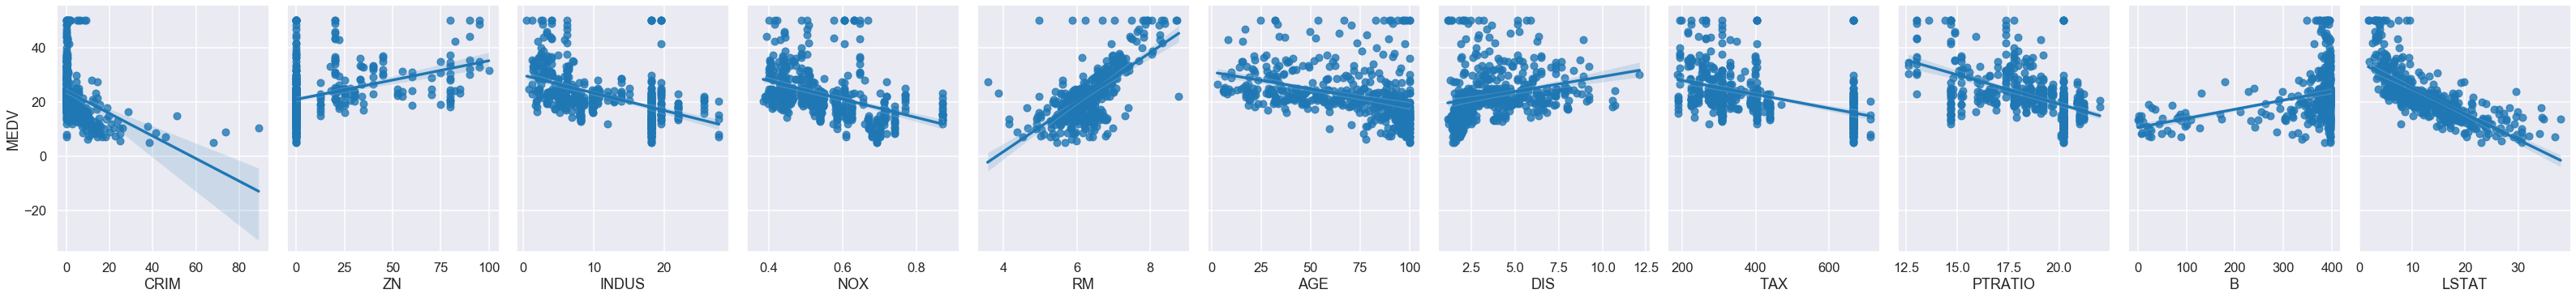

In [17]:
# Visualize distribution of numerical variables wrt. Target variable

sns.pairplot(data=df, x_vars=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM',
                               'AGE', 'DIS', 'TAX', 'PTRATIO', 'B','LSTAT'],\
             y_vars=['MEDV'],\
             height=5, aspect=.8, kind="reg");

**Observation**: 
- RM, LSTAT appears to have a stronger linear relationship compared to the other variables. 
- Presence of extreme outliers is not noticeable, except for the upper right point for `TAX` to `MEDV` plot. 

In [18]:
# Check out the outliers in `TAX`
df.loc[(df['MEDV']>40) & (df['TAX']>600)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


In [19]:
# Remove the outliers
df = df[(df['MEDV']<=40) | (df['TAX']<=600)]
df.shape

(501, 14)

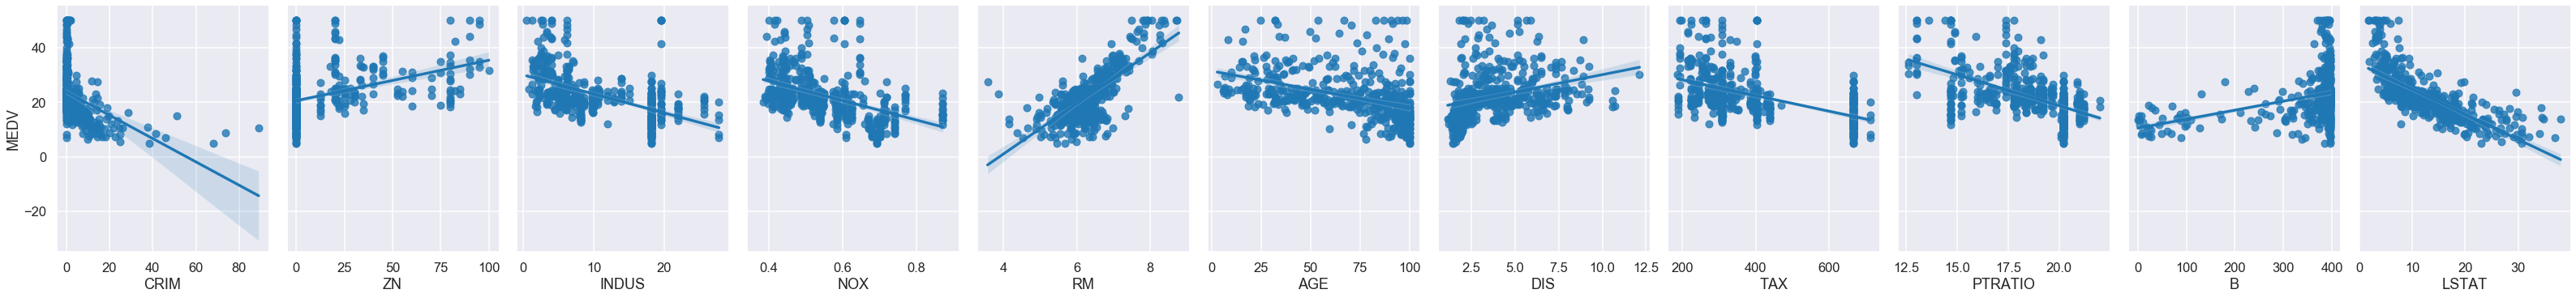

In [20]:
# Effect of removing outliers in `TAX` on linearity of variables to target 
sns.pairplot(data=df, x_vars=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM',
                               'AGE', 'DIS', 'TAX', 'PTRATIO', 'B','LSTAT'],\
             y_vars=['MEDV'],\
             height=5, aspect=.8, kind="reg");

Correlation of variables **(Ref 2)**
- Continuous variables: Normal distributed -> Pearson correlation, not normal distributed -> Kendall correlation
- Nomial variables: Kendall correlation
- Ordinal variables: Spearman correlation
- `CHAS` is nominal variable, `RAD` is ordinal variable; start with heatmap of continuous variables

In [21]:
df_cont = df.copy()
df_cont.drop(['CHAS','RAD'],axis=1,inplace=True)


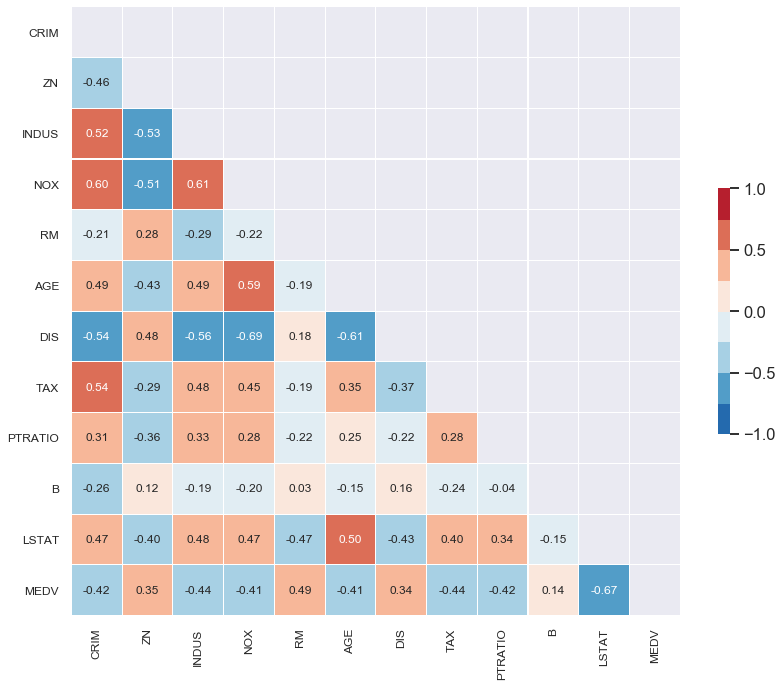

In [22]:
# Heat map of continuous variables
mask = np.zeros_like(df_cont.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)]= True 
fig, ax = plt.subplots(figsize=(12, 12)) 
sns.heatmap(df_cont.corr(method='kendall'),
            annot = True,
            annot_kws={"size": 12}, 
            fmt=".2f",
            mask = mask, 
            square=True, 
            vmin = -1, 
            vmax = 1, 
            linewidth=0.1, 
            cbar_kws = {'shrink':0.3}, 
            cmap=sns.color_palette("RdBu_r", 8))
ax.tick_params(labelsize=12) 
plt.tight_layout();

In [23]:
df_cont.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV'],
      dtype='object')

Based on the correlation figures more than absolute value 0.4, select 'CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'.
Presence of multi-collinearity between `INDUS` and `NOX`, `AGE` and `NOX`, `AGE` and `LSTAT` among remaining variables. 
Drop `NOX`, `B`, `ZN` `DIS` and `CRIM` to address multi-collinearity. 

In [24]:
df.drop(['NOX','B','ZN', 'CRIM'],axis=1,inplace=True)

In [25]:
df.columns

Index(['INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT',
       'MEDV'],
      dtype='object')

In [26]:
# One-hot encode CHAS (categorical nominal, binary class)
df_wdummy = pd.get_dummies(df,columns=['CHAS'],drop_first = True)

In [27]:
df_wdummy

,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_1.0
0,2.31,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,0
1,7.07,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,0
2,7.07,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,0
3,2.18,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,0
4,2.18,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...
501,11.93,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,0
502,11.93,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,0
503,11.93,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,0
504,11.93,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,0


In [28]:
df_chas = df_wdummy[['CHAS_1.0','MEDV']].copy()

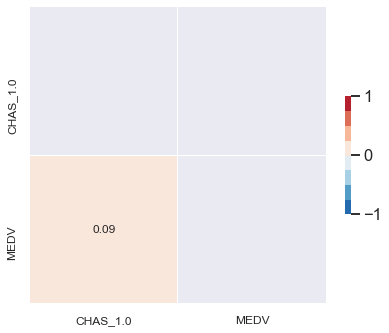

In [29]:
# Heatmap 
mask = np.zeros_like(df_chas.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)]= True 
fig, ax = plt.subplots(figsize=(6, 6)) 
sns.heatmap(df_chas.corr(method='kendall'),
            annot = True,
            annot_kws={"size": 12}, 
            fmt=".2f",
            mask = mask, 
            square=True, 
            vmin = -1, 
            vmax = 1, 
            linewidth=0.1, 
            cbar_kws = {'shrink':0.3}, 
            cmap=sns.color_palette("RdBu_r", 8))
ax.tick_params(labelsize=12) 
plt.tight_layout();

Noting the low correlation value of `CHAS` we choose not to use the variable for the model.

In [30]:
# Define dictionaries of ordinal variable's rank classes for `RAD`
RAD_dict = {1.:1, 2.:2, 3.:3, 4.:4, 5.:5, 6.:6, 7.:7, 8.:8, 24.:24}

In [31]:
df_wdummy['RAD'] = df_wdummy['RAD'].map(RAD_dict)

In [32]:
df_rad = df_wdummy[['RAD','MEDV']].copy()

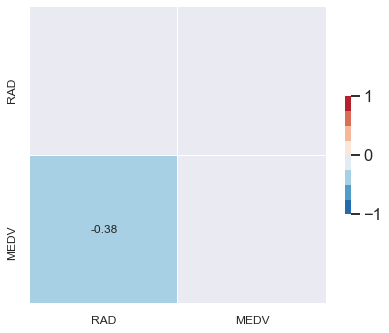

In [33]:
# Heatmap (annotate if you'd like to)
mask = np.zeros_like(df_rad.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)]= True 
fig, ax = plt.subplots(figsize=(6, 6)) 
sns.heatmap(df_rad.corr(method='spearman'),
            annot = True,
            annot_kws={"size": 12}, 
            fmt=".2f",
            mask = mask, 
            square=True, 
            vmin = -1, 
            vmax = 1, 
            linewidth=0.1, 
            cbar_kws = {'shrink':0.3}, 
            cmap=sns.color_palette("RdBu_r", 8))
ax.tick_params(labelsize=12) 
plt.tight_layout();

Use `RAD` for model.

In [34]:
df_wdummy.columns

Index(['INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV',
       'CHAS_1.0'],
      dtype='object')

---

### Pandas profiling

**Note:** A quick google search indicates there are compatibility issues betwen pandas and pandas profiling versions.

This notebook worked on pandas version (1.0.1) and pandas profiling (2.4.0). If default installation of pandas profiling and upgrade is not working as it should via the anaconda navigator, try: `conda install -c conda-forge/label/cf202003 pandas-profiling` , **see Ref 1** for more details.

In [58]:
# Set a clean dataframe for EDA libraries
df_v = pd.DataFrame(boston.data)
# Name the columns
df_v.columns=boston.feature_names
# Add the target column
df_v['MEDV'] = boston.target

In [36]:
print(f"pandas ver.: {pd.__version__}")
import pandas_profiling as pp
print(f"pandas_profiling ver.: {pp.__version__}")

pandas ver.: 1.0.5
pandas_profiling ver.: 2.4.0


In [37]:
# Let's see what pandas profiling can do!
from pandas_profiling import ProfileReport
#from pandas_profiling.utils.cache import cache_file
from ipywidgets import widgets

In [38]:
profile = ProfileReport(df_v)

Two alternatives available to view output: 1.interactive widget within jupyter notebook or 2. HTML format that can be viewed external to notebook. The html format is essentially the same content as that via interactive widget. It makes for data viewing external to notebook.

Pandas profiling provides an overview, followed by statistical information of the variables (alphabetical order). Correlations (using different statistical approaches) are illustrated via heatmaps under the correlations tab. Presence of missing values (if any) is marked by empty white space in the diagrams - similar to the `missingno` package.  Interesting! 

Though the high collinearity between `INDUS` and `NOX` wasn't surfaced in the overview page, one can identify it in the heatmap. 


In [39]:
# 1. Interactive widget within the Jupyter NB
profile.to_widgets()

In [40]:
# 2. HTML output 
profile.to_notebook_iframe()

In [41]:
# Save the HTML report
profile.to_file("output.html")

---

## Sweetviz
Generates HTML report. built for quickly visualizing relation of Target to Predictor variables, and dataset comparisons (Train, Validate,Test datasets).
Supports Python 3.6+ and Pandas 0.25.3+, though not yet for Google Colab. Installation via pip only (for now, I think).

In [42]:
#!pip install sweetviz

In [43]:
import sweetviz as sv

In [44]:
sweetviz_report = sv.analyze([df_v,"data"],target_feat='MEDV')

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [45]:
sweetviz_report.show_html('viz.html')

Report viz.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


Sweetviz output could be thought of as a left-right panel display. Left panel shows top-level dataset characteristics. consists of respective variable summary statistics, followed by summary statistics for respective variables. 

The right panel shows more in-depth analysis of the inter-variable relations (pearson correlation) and distribution of values. Grouping of variables by numerical and categorical types can be found under this space (uncertain if sweetviz is able to auto-identify categorical features though).

To navigate among variables, click on the variable, and a red bounding box would appear to "lock" the right panel display in place. Unclick again to move on to other variables.

### Which is better for EDA?
It depends on the needs of the reader and personal preference. Both pandas profiling and sweetviz automates and sped up the eda processes to a certain degree. They offer a quick insight into the characteristics of the dataset. Their outputs all have summary statistics (duh) by default, in slightly different configurations. For example, sweetviz's summary stats is rounded to 1-decimal (might have some way to tweak the output values, more exploration to be done). Should one require a heatmap for visualize correlation among variables, pandas profiling does the job.

For starters, it's good to be grounded in pandas functions for EDA before trying pandas profiling and sweetviz. Imho, it is more important to be equipped with the fundamental statistical knowledge so one knows how to use these tools to its full potential.

---

# Part 2: Building a Linear Regression Model


In [35]:
# X and y array
X = df_wdummy[['INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS_1.0']]
y = df_wdummy['MEDV']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

## Instantiate & Fit Model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [38]:
# print the intercept
print(f"model 1 intercept: {round(lr.intercept_,3)}")

model 1 intercept: 25.264


In [39]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient_model 1'])
coeff_df

,Coefficient_model 1
INDUS,-0.083074
RM,4.615810
AGE,-0.028910
DIS,-0.846333
RAD,0.090064
TAX,-0.010427
PTRATIO,-0.897883
LSTAT,-0.465060
CHAS_1.0,0.583946


Interpreting the coefficients for model 1:

Holding all other features fixed, 
- 1 unit increase in `INDUS` is associated with a **decrease of 0.08 MEDV (in \$1000's)**
- 1 unit increase in `RM `is associated with an **increase of 4.62 MEDV (in \$1000's)**
- 1 unit increase in `AGE` is is associated with a **decrease of 0.03 MEDV (in \$1000's)**
and so on.


## Predictions from LR Model

In [40]:
predictions = lr.predict(X_test)

In [41]:
review = pd.DataFrame({'Test': y_test, 'pred': predictions}, columns=['Test', 'pred'])

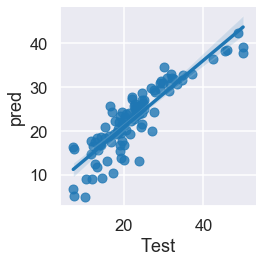

In [42]:
sns.lmplot(x='Test', y='pred',data=review,height=4)

plt.tight_layout();

**Residual Histogram**

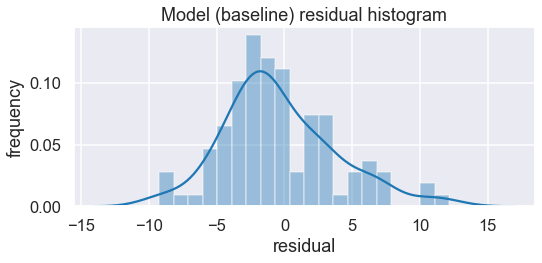

In [43]:
fig, (axes1) = plt.subplots(nrows=1, ncols=1, figsize=(8,4),sharey=True)

sns.distplot((y_test-predictions),bins=20, ax=axes1)
axes1.set_xlabel('residual')
axes1.set_ylabel('frequency')
axes1.set_title('Model (baseline) residual histogram')

plt.tight_layout();

Residuals of the model is not an exact normal distribution. There is slight right skew. 

## Regression Evaluation Metrics

Use **Root Mean Squared Error** (RMSE), **R2** and **adjusted R2**. 
- RMSE measures the standard deviation of the residuals (difference between actual and predicted values.) It is a loss function, (optimisation of model by minimizing it). 
- R2 is a measure of the percentage of target variable explainable by the variables used for prediction. 
- adjusted R-squared is a variation of R2. Adjusting for the number of predictors in the model, it increases when the added variables improves the model.

In [44]:
from sklearn import metrics

In [45]:
# define function for r2 adjusted
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [46]:
print("Evaluation Metrics Summary")
print("- Model (baseline) -")
print(f"RMSE: {round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),3)}")
print(f"R2:   {round(metrics.r2_score(y_test, predictions),3)}")
print(f"adjusted R2: {round(r2_adj(y_test, predictions,X.shape[1]),3)}")
print("----------")


Evaluation Metrics Summary
- Model (baseline) -
RMSE: 4.144
R2:   0.789
adjusted R2: 0.768
----------


In [55]:
# another way to get adjusted R2, from statsmodel.api along with other stats such as p-values
import statsmodels.api as sm

X = sm.add_constant(X)

model_baseline = sm.OLS(y, X)

model_baseline = model_baseline.fit()

print(f"model (baseline) summary: {model_baseline.summary()}")

model (baseline) summary:                             OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.42e-149
Time:                        23:50:16   Log-Likelihood:                -1437.1
No. Observations:                 501   AIC:                             2894.
Df Residuals:                     491   BIC:                             2936.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9084     

The warnings on multi-collinearity stems from correlation between `AGE` and `LSTAT` as well as `DIS` with a number of other variables. Create a few more models to review the effect of
- `DIS` removed
- `AGE` removed
- both removed

In [48]:
# `DIS` removed
X1 = df_wdummy[['INDUS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS_1.0']]
# `AGE` removed
X2 = df_wdummy[['INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS_1.0']]
# both removed
X3 = df_wdummy[['INDUS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS_1.0']]

In [49]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=99)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=99)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=99)

In [50]:
lr1 = LinearRegression()
lr1.fit(X1_train,y1_train)
lr2 = LinearRegression()
lr2.fit(X2_train,y2_train)
lr3 = LinearRegression()
lr3.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
predictions1 = lr1.predict(X1_test)
predictions2 = lr2.predict(X2_test)
predictions3 = lr3.predict(X3_test)

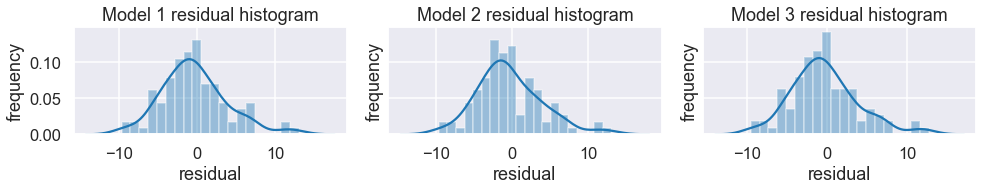

In [52]:
# Residual Histograms
fig, (axes1, axes2, axes3) = plt.subplots(nrows=1, ncols=3, figsize=(14,3),sharey=True)

sns.distplot((y1_test-predictions1),bins=20, ax=axes1)
axes1.set_xlabel('residual')
axes1.set_ylabel('frequency')
axes1.set_title('Model 1 residual histogram')

sns.distplot((y2_test-predictions2),bins=20, ax=axes2)
axes2.set_xlabel('residual')
axes2.set_ylabel('frequency')
axes2.set_title('Model 2 residual histogram')

sns.distplot((y3_test-predictions3),bins=20, ax=axes3)
axes3.set_xlabel('residual')
axes3.set_ylabel('frequency')
axes3.set_title('Model 3 residual histogram')
plt.tight_layout();

In [53]:
print("Evaluation Metrics Summary")
print("- Model 1 -")
print(f"RMSE: {round(np.sqrt(metrics.mean_squared_error(y1_test, predictions1)),3)}")
print(f"R2:   {round(metrics.r2_score(y1_test, predictions1),3)}")
print(f"adjusted R2: {round(r2_adj(y1_test, predictions1, X1.shape[1]),3)}")
print("----------")
print("- Model 2 -")
print(f"RMSE: {round(np.sqrt(metrics.mean_squared_error(y2_test, predictions2)),3)}")
print(f"R2:   {round(metrics.r2_score(y2_test, predictions2),3)}")
print(f"adjusted R2: {round(r2_adj(y2_test, predictions2, X1.shape[1]),3)}")
print("----------")
print("- Model 3 -")
print(f"RMSE: {round(np.sqrt(metrics.mean_squared_error(y3_test, predictions3)),3)}")
print(f"R2:   {round(metrics.r2_score(y3_test, predictions3),3)}")
print(f"adjusted R2: {round(r2_adj(y3_test, predictions3, X1.shape[1]),3)}")
print("----------")

Evaluation Metrics Summary
- Model 1 -
RMSE: 4.194
R2:   0.784
adjusted R2: 0.765
----------
- Model 2 -
RMSE: 4.232
R2:   0.78
adjusted R2: 0.76
----------
- Model 3 -
RMSE: 4.18
R2:   0.785
adjusted R2: 0.766
----------


In [54]:
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)

model1 = sm.OLS(y, X1)
model2 = sm.OLS(y, X2)
model3 = sm.OLS(y, X3)

model1 = model1.fit()
model2 = model2.fit()
model3 = model3.fit()

print(f"model 1 summary: {model1.summary()}")
print(f"model 2 summary: {model2.summary()}")
print(f"model 3 summary: {model3.summary()}")

model 1 summary:                             OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     188.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.57e-144
Time:                        23:46:01   Log-Likelihood:                -1450.3
No. Observations:                 501   AIC:                             2919.
Df Residuals:                     492   BIC:                             2957.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1938      3.667   

Best performing model of the lot is model 3, with following metrics: 
- RMSE: 4.18, 
- R2:   0.785,
- adjusted R2: 0.766

Baseline model performance is 
- RMSE: 4.144,
- R2: 0.789
- adjusted R2: 0.765. 

If we examine the models' AIC and BIC, we can see that model 3 has slightly higher AIC & BIC (2917, 2951), compared to the baseline model (2894 & 2936).
Lower values indicate better fit to data.


---

# Part 3: More Feature Selection & Regularized Regression
Selecting variables based on p-value < 0.05 is one way to identify variables of significant contribution to the target we are trying to predict, but has its own set of challenges (see **Ref 3**).

The **presence of multi-collinearity can mask the importance of respective variable contribution to the target variable**. Interpretability of p-values becomes a problem. In the heatmap earlier, we saw the high correlation among predictor variables `TAX` and `RAD`, and `NOX` and `INDUS`. In the following examples (Examples 1 to 4), the phenomena reflects similar challenges (i.e. the importance of contribution of  `TAX` and `RAD`, and `NOX` and `INDUS` to the `MEDV`). 

### Example 1

In [59]:
# Original (full) set of variables
X_o = df_v[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',\
         'PTRATIO', 'B', 'LSTAT']]
X_o = sm.add_constant(X_o)
y_o = df_v['MEDV']
# Baseline results
model_o = sm.OLS(y_o, X_o)
results_o = model_o.fit()
results_o.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          6.72e-135
Time:                        00:11:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Example 2
Note the all p-values lower than 0.05, and that multi-colliearity still exists (`TAX` and `RAD`).

In [60]:
# Remove Age -> Remove INDUS, based on p-values.
 
X_r = df_v[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',\
         'PTRATIO', 'B', 'LSTAT']]
X_r = sm.add_constant(X_r)
y_r = df_v['MEDV']
# results
model_r = sm.OLS(y_r, X_r)
results_r = model_r.fit()
results_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          5.54e-137
Time:                        00:11:51   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Example 3

In [61]:
# remove `Age` -> remove `NOX` -> remove `RAD`
X_r1 = df_v[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'TAX',\
         'PTRATIO', 'B', 'LSTAT']]
X_r1 = sm.add_constant(X_r1)
y_r1 = df_v['MEDV']
# results
model_r1 = sm.OLS(y_r1, X_r1)
results_r1 = model_r1.fit()
results_r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     127.2
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          7.62e-130
Time:                        00:12:41   Log-Likelihood:                -1518.3
No. Observations:                 506   AIC:                             3059.
Df Residuals:                     495   BIC:                             3105.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7372      4.274      4.384      0.000      10.340      27.134
CRIM          -0.0636      0.033     -1.938      0.053      -0.128       0.001
ZN             0.0450      0.014      3.217      0.001       0.018       0.073
INDUS         -0.1218      0.059     -2.056      0.040      -0.238      -0.005
CHAS           2.8743      0.885      3.248      0.001       1.135       4.613
RM             4.1296      0.419      9.855      0.000       3.306       4.953
DIS           -1.1547      0.182     -6.348      0.000      -1.512      -0.797
TAX           -0.0016      0.002     -0.713      0.476      -0.006       0.003
PTRATIO       -0.6744      0.126     -5.332      0.000      -0.923      -0.426
B              0.0092      0.003      3.318      0.001       0.004       0.015
LSTAT         -0.5578      0.049    -11.476      0.000      -0.653      -0.462
==============================================================================
Omnibus:                      188.480   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              918.526
Skew:                           1.582   Prob(JB):                    3.50e-200
Kurtosis:                       8.793   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Example 4

In [62]:
# remove `Age` -> remove `INDUS`  -> remove `TAX`
X_r2 = df_v[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD',\
         'PTRATIO', 'B', 'LSTAT']]
X_r2 = sm.add_constant(X_r2)
y_r2 = df_v['MEDV']
# results
model_r2 = sm.OLS(y_r2, X_r2)
results_r2 = model_r2.fit()
results_r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.7
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.84e-135
Time:                        00:12:44   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3079.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7123      5.103      6.803      0.000      24.687      44.738
CRIM          -0.1048      0.033     -3.164      0.002      -0.170      -0.040
ZN             0.0366      0.013      2.731      0.007       0.010       0.063
CHAS           2.9679      0.861      3.448      0.001       1.277       4.659
NOX          -20.3144      3.472     -5.850      0.000     -27.137     -13.492
RM             3.9771      0.408      9.754      0.000       3.176       4.778
DIS           -1.4294      0.187     -7.647      0.000      -1.797      -1.062
RAD            0.1288      0.041      3.157      0.002       0.049       0.209
PTRATIO       -1.0149      0.129     -7.867      0.000      -1.268      -0.761
B              0.0097      0.003      3.591      0.000       0.004       0.015
LSTAT         -0.5281      0.048    -11.019      0.000      -0.622      -0.434
==============================================================================
Omnibus:                      166.907   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.418
Skew:                           1.441   Prob(JB):                    2.40e-149
Kurtosis:                       7.915   Cond. No.                     9.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Variance inflation factor

>Another approach to identification of multi-collinearity is the *variance inflation factor* (VIF). VIF indicates the percentage of the variance inflated for each variable's coefficient. Beginning at value of 1 (no collinearity), a VIF between 1-5 indicates moderate collinearity while values above 5 indicates high collinearity. Some cases where high VIF is fine includes the use of interaction terms, polynomial terms, or dummy variables (nominal variables with three or more categories).

> In example below, the multi-collinearity between `TAX` and `RAD` is indicated by the relatively higher figures. Note this still require prior knowledge of correlation among variable pairs (esp. in presence of multiple correlated variable-pairs). The original VIF values corresponds with the heatmap: high correlation among predictor variables `TAX` and `RAD`, and `NOX` and `INDUS`. Removal of the variables `RAD` and `NOX` improved the VIF values. 

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.Series([variance_inflation_factor(X_o.values, i) for i in range(X_o.shape[1])], index=X_o.columns,
                 name='vif_full')
vif_ = pd.Series([variance_inflation_factor(X_r.values, i) for i in range(X_r.shape[1])], index=X_r.columns,
                  name='vif_collinear_rvmd')
pd.concat([vif, vif_], axis=1)

,vif_full,vif_collinear_rvmd
const,585.265238,579.255845
CRIM,1.792192,1.789704
ZN,2.298758,2.239229
INDUS,3.991596,NaN
CHAS,1.073995,1.059819
NOX,4.393720,3.778011
RM,1.933744,1.834806
AGE,3.100826,NaN
DIS,3.955945,3.443420
RAD,7.484496,6.861126


In [71]:
# Preparing for Regularized Regression
df = pd.DataFrame(boston.data)
# Name the columns
df.columns=boston.feature_names
# Add the target column
df['MEDV'] = boston.target
# Remove the outliers
df = df[(df['MEDV']<=40) | (df['TAX']<=600)]

In [72]:
df_wdummy = pd.get_dummies(df,columns=['CHAS'],drop_first = True)
df_wdummy['RAD'] = df_wdummy['RAD'].map(RAD_dict)

In [73]:
df_wdummy.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CHAS_1.0'],
      dtype='object')

In [74]:
# Regularized Regression, building upon the baseline LR model
X = df_wdummy[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CHAS_1.0']]
y = df_wdummy['MEDV']

In [99]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [76]:
# Import lib, Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [77]:
ss.fit(X4_train)
X4_train_sc = ss.transform(X4_train)
X4_test_sc = ss.transform(X4_test)

In [78]:
# Import libraries 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score


In [79]:
# find optimal alpha for ridge regression
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X4_train_sc, y4_train)

print(optimal_ridge.alpha_)

# cross-validate R2 of Ridge regression w optimal alpha
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X4_train_sc, y4_train, cv=10)
print(ridge_scores.mean())

9.011018251665021
0.7528313363268582


In [80]:
# find optimal alpha for Lasso regression

# Lasso unlike ridge performs best searching for alpha through linear space (np.linspace).
# Or set upper limit of alphas to serach through
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X4_train_sc, y4_train)

print(optimal_lasso.alpha_)

# cross-validate R2 of Lasso regression w optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X4_train_sc, y4_train, cv=10)
print(lasso_scores.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.007624107658777657
0.7521124722582349


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


Lasso deals primarily with the feature selection of valuable variables, eliminating ones that are not useful. It penalizes the sum of absolute values of the coefficients (**L1 penalty**) This also takes care of multicollinearity by choosing the "best" of the correlated variables and zeroing-out the other redundant ones. Ridge penalizes sum of squared coefficients (**L2 penalty**); it reduces the coefficients of less useful variables to a small value, but not zero.


In [81]:
# find optimal value for ElasticNet regression

# alpha: strength of regularization
# l1_ratio: amount of ridge vs. lasso (0 = all ridge, 1 = all lasso; never use 0, will break)
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(X4_train_sc, y4_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

# cross-validate R2 of ElasticNet regression w optimal values
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X4_train_sc, y4_train, cv=10)
print(enet_scores.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.02191537174035496
0.29875
0.7525882252446323


................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    6.4s finished


In [82]:
# Ridge CV seems to be doing the best. Let's move forward with the model.
# Since fitted ridge using cross_val_Score, need to fit it outside to extract the coefficients
ridge.fit(X4_train_sc, y4_train)

Ridge(alpha=9.011018251665021, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

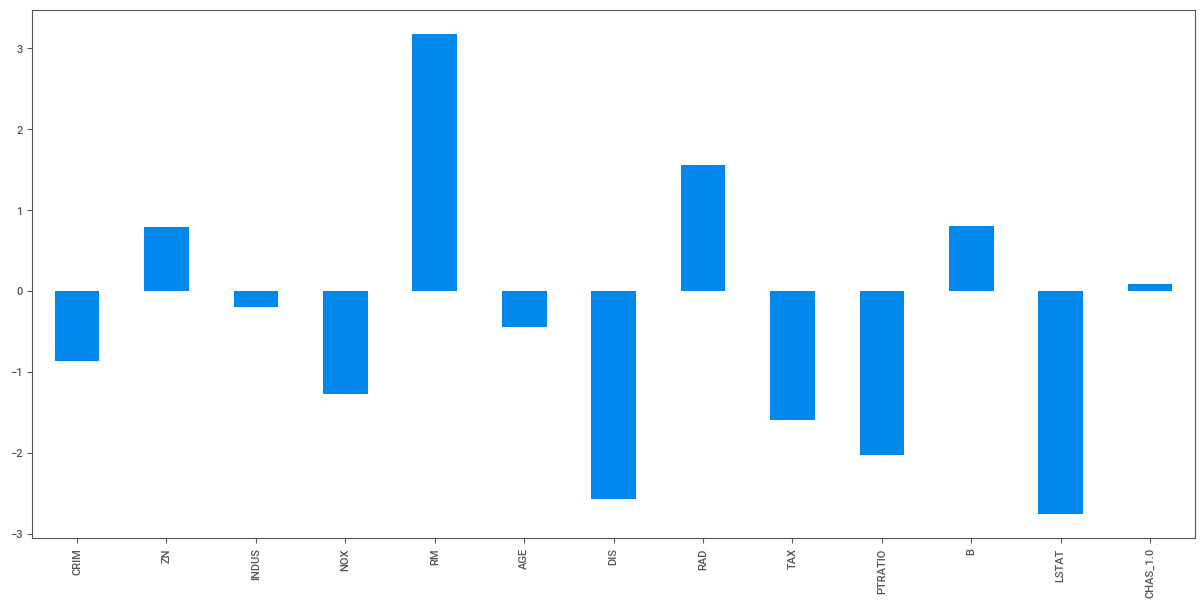

In [83]:
# pandas plot
features = [col for col in X]
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7));

In [84]:
predictions4 = ridge.predict(X4_test_sc)

In [85]:
print("Evaluation Metrics Summary")
print("- Model 4 -")
print(f"RMSE: {round(np.sqrt(metrics.mean_squared_error(y4_test, predictions4)),3)}")
print(f"R2:   {round(metrics.r2_score(y4_test, predictions4),3)}")
print(f"adjusted R2: {round(r2_adj(y4_test, predictions4, X.shape[1]),3)}")
print("----------")
print("- Model (baseline) -")
print(f"RMSE: {round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),3)}")
print(f"R2:   {round(metrics.r2_score(y_test, predictions),3)}")
print(f"adjusted R2: {round(r2_adj(y_test, predictions,X.shape[1]),3)}")
print("----------")

Evaluation Metrics Summary
- Model 4 -
RMSE: 3.984
R2:   0.805
adjusted R2: 0.775
----------
- Model (baseline) -
RMSE: 4.144
R2:   0.789
adjusted R2: 0.757
----------


Ridge regression model performs better than the baseline linear regression model.

---

## Part 4: Interaction Terms

In [86]:
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CHAS_1.0']
X

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,0


In [87]:
from sklearn.preprocessing import PolynomialFeatures
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [88]:
X_poly = poly.fit_transform(X) 

In [90]:
poly.get_feature_names(features)

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'CHAS_1.0',
 'CRIM^2',
 'CRIM ZN',
 'CRIM INDUS',
 'CRIM NOX',
 'CRIM RM',
 'CRIM AGE',
 'CRIM DIS',
 'CRIM RAD',
 'CRIM TAX',
 'CRIM PTRATIO',
 'CRIM B',
 'CRIM LSTAT',
 'CRIM CHAS_1.0',
 'ZN^2',
 'ZN INDUS',
 'ZN NOX',
 'ZN RM',
 'ZN AGE',
 'ZN DIS',
 'ZN RAD',
 'ZN TAX',
 'ZN PTRATIO',
 'ZN B',
 'ZN LSTAT',
 'ZN CHAS_1.0',
 'INDUS^2',
 'INDUS NOX',
 'INDUS RM',
 'INDUS AGE',
 'INDUS DIS',
 'INDUS RAD',
 'INDUS TAX',
 'INDUS PTRATIO',
 'INDUS B',
 'INDUS LSTAT',
 'INDUS CHAS_1.0',
 'NOX^2',
 'NOX RM',
 'NOX AGE',
 'NOX DIS',
 'NOX RAD',
 'NOX TAX',
 'NOX PTRATIO',
 'NOX B',
 'NOX LSTAT',
 'NOX CHAS_1.0',
 'RM^2',
 'RM AGE',
 'RM DIS',
 'RM RAD',
 'RM TAX',
 'RM PTRATIO',
 'RM B',
 'RM LSTAT',
 'RM CHAS_1.0',
 'AGE^2',
 'AGE DIS',
 'AGE RAD',
 'AGE TAX',
 'AGE PTRATIO',
 'AGE B',
 'AGE LSTAT',
 'AGE CHAS_1.0',
 'DIS^2',
 'DIS RAD',
 'DIS TAX',
 'DIS PTRATIO',
 'DIS B',
 'DIS LSTAT',
 

In [91]:
# View X_poly in a DataFrame
pd.DataFrame(X_poly, columns = poly.get_feature_names(features)).head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,...,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,PTRATIO CHAS_1.0,B^2,B LSTAT,B CHAS_1.0,LSTAT^2,LSTAT CHAS_1.0,CHAS_1.0^2
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,...,234.09,6072.570,76.194,0.0,157529.6100,1976.5620,0.0,24.8004,0.0,0.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,...,316.84,7064.820,162.692,0.0,157529.6100,3627.6660,0.0,83.5396,0.0,0.0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,...,316.84,6992.374,71.734,0.0,154315.4089,1583.1049,0.0,16.2409,0.0,0.0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,...,349.69,7379.581,54.978,0.0,155732.8369,1160.2122,0.0,8.6436,0.0,0.0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,...,349.69,7422.030,99.671,0.0,157529.6100,2115.4770,0.0,28.4089,0.0,0.0


In [93]:
# Iterate through different combinations of variables, cross validate the model and 
# determine the set of features with best performance
from itertools import combinations
combs = []
for i in range(1, len(X.columns)+1):
    for c in combinations(X.columns.tolist(), i):
        combs.append(c)

In [94]:
R2_results = {}
linreg = LinearRegression()
for i,c in enumerate(combs):
    if (i % 250) == 0:
        print (i)
    subX = X[list(c)]
    R2_results[c] = np.mean(cross_val_score(linreg, subX, y))

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
6750
7000
7250
7500
7750
8000


In [95]:
results = R2_results.items()
results = sorted(results, key=lambda x: x[1], reverse=True)

In [96]:
for i in range(5):
    print (results[i])

(('CRIM', 'ZN', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS_1.0'), 0.5369120361379023)
(('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS_1.0'), 0.5365691410118671)
(('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'), 0.5336744204027848)
(('CRIM', 'ZN', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'), 0.5335017085597941)
(('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS_1.0'), 0.5303768595898998)


---

In [100]:
# Another approach for polynomial terms (base code from: Ref 4
# https://www.datasklr.com/ols-least-squares-regression/interaction-effects-and-polynomials-in-multiple-linear-regression)
# Split the data into train-test sets first
X5_train, X5_test, y5_train, y5_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [71]:
# Create interaction terms for train and test sets
poly = PolynomialFeatures(degree=2, include_bias=False)


NameError: name 'PolynomialFeatures' is not defined

In [70]:
# train (process it into a dataframe)
Xtrain_inter = pd.DataFrame(poly.fit_transform(X5_train), columns=poly.get_feature_names(features))
# test
Xtest_inter = pd.DataFrame(poly.fit_transform(X5_test), columns=poly.get_feature_names(features))

NameError: name 'poly' is not defined

In [108]:
# Create replica of train and test data frame, to hold the first interaction term
# interaction term will be replaced as each interaction terms is looped through
Xtrain_inter_l = Xtrain_inter.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
Xtest_inter_l = Xtest_inter.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

       CRIM   ZN  INDUS    NOX     RM    AGE     DIS   RAD    TAX  PTRATIO  \
0   0.16902  0.0  25.65  0.581  5.986   88.4  1.9929   2.0  188.0     19.1   
1  14.42080  0.0  18.10  0.740  6.461   93.3  2.0026  24.0  666.0     20.2   
2  15.17720  0.0  18.10  0.740  6.152  100.0  1.9142  24.0  666.0     20.2   

        B  LSTAT  CHAS_1.0      CRIM^2  
0  385.02  14.81       0.0    0.028568  
1   27.49  18.05       0.0  207.959473  
2    9.32  26.45       0.0  230.347400  


In [110]:
# index of Xtrain_inter reset during computation. Reset index of y as well
ytrain_inter = y5_train.reset_index()
ytrain_inter = ytrain_inter.drop(['index'], axis=1)

In [112]:
# total terms (initial + interaction)
len(Xtrain_inter.columns)

104

In [113]:
# get the adjusted r2 for each model
numbers=[]
for i in range(13,104):
    
    Xtrain_inter_l2 = Xtrain_inter.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, i]]
    modelx = sm.OLS(ytrain_inter, sm.add_constant(Xtrain_inter_l2)).fit()
    numbers.append(modelx.rsquared_adj)
    
#place the array into a data frame
numbers_df=pd.DataFrame(numbers)
numbers_df.head()

,0
0,0.776434
1,0.776218
2,0.775903
3,0.781881
4,0.804031


In [117]:
#Get row names for all interaction and polynomial features

names=Xtrain_inter.drop(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                         'PTRATIO', 'B', 'LSTAT', 'CHAS_1.0'], axis=1)
col_heads=pd.DataFrame(list(names))
col_heads

#concatenate col_heads and numbers_df
output=pd.concat([col_heads, numbers_df.reset_index(drop=True)], axis=1)
output.head()

#include columns names 
output.columns=['names', 'rsquared_adj']

#sort by adjusted r squared
output_sort=output.sort_values(by=['rsquared_adj'])
output_sort

,names,rsquared_adj
2,CRIM INDUS,0.775903
19,ZN RAD,0.775909
22,ZN B,0.775912
15,ZN NOX,0.775916
54,RM CHAS_1.0,0.775925
...,...,...
51,RM PTRATIO,0.822391
49,RM RAD,0.843744
53,RM LSTAT,0.845118
50,RM TAX,0.849408


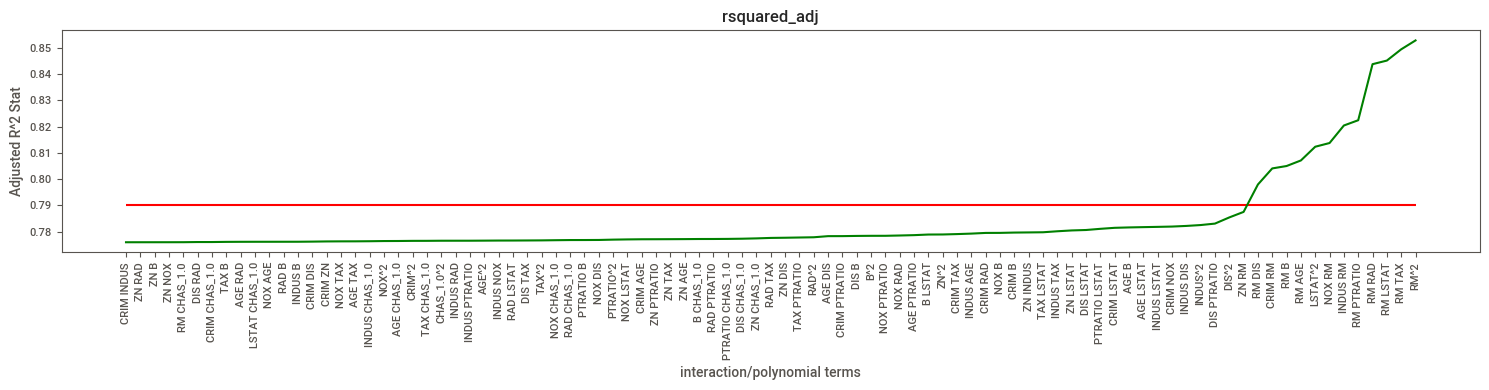

In [123]:
x = output_sort['names']
y = output_sort['rsquared_adj']

fig = plt.figure(figsize=(15,4))
plt.plot(x, y, 'g')
plt.xlabel('interaction/polynomial terms')
plt.xticks(rotation=90)
plt.hlines(0.79,xmin='CRIM INDUS', xmax = 'RM^2',color='r')
plt.ylabel('Adjusted R^2 Stat')
plt.title('rsquared_adj')
plt.tight_layout();

Adjusted-R2 threshold set at 0.79, only those above 0.79 considered.

Following terms gives adjusted R2 above 0.79.
'RM DIS', 'CRIM RM', 'RM B', 'RM AGE', 'LSTAT^2', 'NOX RM', 'INDUS RM', 'RM PTRATIO', 
'RM RAD', 'RM LSTAT', 'RM TAX', 'RM^2'

In [69]:
df_inter=Xtrain_inter[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                  'PTRATIO', 'B', 'LSTAT', 'CHAS_1.0',
                  'RM DIS', 'CRIM RM', 'RM B', 'RM AGE', 'LSTAT^2', 'NOX RM', 'INDUS RM', 'RM PTRATIO',
                  'RM RAD', 'RM LSTAT', 'RM TAX', 'RM^2']]

#Fit model with new dataset stored in selected_df
import statsmodels.api as sm

model = sm.OLS(ytrain_inter, sm.add_constant(df_inter)).fit()
print_model = model.summary()
print(print_model)

NameError: name 'Xtrain_inter' is not defined

The above model has a significant improvement in adjusted-R2 of 0.882, and AIC & BIC were noted to be reduced as well (technically we didn't use them to evaluate and select model). However, it has the issue of multi-collinearity. Using VIF, review the variables of the baseline model.

From the vif below, we see TAX and RAD has high vif. In the first heatmap (generated using .corr()) above, TAX is not collinear with other variables. Let's explore effects of removing `RAD` and `TAX`

In [76]:
# Explore mitigating multi-collinearity
vif_bl = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,
                 name='vif_full')

X_noTAX = X.drop(['TAX'],axis=1)
X_noRAD = X.drop(['RAD'],axis=1)
vif_noTAX = pd.Series([variance_inflation_factor(X_noTAX.values, i) for i in range(X_noTAX.shape[1])],
                      index=X_noTAX.columns, name='vif_noTAX')
vif_noRAD = pd.Series([variance_inflation_factor(X_noRAD.values, i) for i in range(X_noRAD.shape[1])],
                      index=X_noRAD.columns, name='vif_noRAD')
pd.concat([vif, vif_noTAX, vif_noRAD], axis=1)

,vif_full,vif_noTAX,vif_noRAD
const,378.962094,366.528495,343.128334
INDUS,3.600497,2.813405,3.352904
RM,1.917133,1.914047,1.868770
AGE,2.833938,2.833064,2.827726
DIS,2.910694,2.877244,2.850935
RAD,6.528301,1.893725,NaN
TAX,8.335349,NaN,2.417912
PTRATIO,1.430972,1.430239,1.379301
LSTAT,3.014639,3.013700,2.968160
CHAS_1.0,1.064632,1.046444,1.056674


Interesting results.. obviously the two variables are correlated. However, looking at the vif figures, it's hard to tell which set of variables would give a better performance. Let's do a quick check.

In [78]:
# Without RAD
model = sm.OLS(y, sm.add_constant(X_noRAD)).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     199.6
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          3.71e-149
Time:                        00:47:33   Log-Likelihood:                -1438.9
No. Observations:                 501   AIC:                             2896.
Df Residuals:                     492   BIC:                             2934.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7465      3.571      5.809      0.0

In [79]:
# Without TAX
model = sm.OLS(y, sm.add_constant(X_noTAX)).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     193.7
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.04e-146
Time:                        00:47:37   Log-Likelihood:                -1444.7
No. Observations:                 501   AIC:                             2907.
Df Residuals:                     492   BIC:                             2945.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.2789      3.734      5.431      0.0

Drop RAD for better model performance. So, building upon the baseline model, the variables to use are:
- 'INDUS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS_1.0'

We'll remove 'DIS' as well given it's collinearity with multiple variables.

In [83]:
X.columns

Index(['const', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT',
       'CHAS_1.0'],
      dtype='object')

In [86]:
X_check = X.drop(['RAD','DIS'],axis=1)

vif_noRAD_DIS = pd.Series([variance_inflation_factor(X_check.values, i) for i in range(X_check.shape[1])],
                      index=X_check.columns, name='vif_noRAD_DIS')
display(pd.concat([vif, vif_noTAX, vif_noRAD, vif_noRAD_DIS], axis=1))
# Without RAD
model = sm.OLS(y, sm.add_constant(X_check)).fit()
print_model = model.summary()
print(print_model)

,vif_full,vif_noTAX,vif_noRAD,vif_noRAD_DIS
const,378.962094,366.528495,343.128334,298.305520
INDUS,3.600497,2.813405,3.352904,2.867424
RM,1.917133,1.914047,1.868770,1.857031
AGE,2.833938,2.833064,2.827726,2.123444
DIS,2.910694,2.877244,2.850935,NaN
RAD,6.528301,1.893725,NaN,NaN
TAX,8.335349,NaN,2.417912,2.416355
PTRATIO,1.430972,1.430239,1.379301,1.374325
LSTAT,3.014639,3.013700,2.968160,2.968088
CHAS_1.0,1.064632,1.046444,1.056674,1.056101


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     211.5
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          4.56e-144
Time:                        00:57:28   Log-Likelihood:                -1453.7
No. Observations:                 501   AIC:                             2923.
Df Residuals:                     493   BIC:                             2957.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6945      3.426      3.997      0.0

In [ ]:
# Further sections to be further updating, pending time availability

In [ ]:
# To update discussion on benefit-cost perspective on model complexities, performance, time-to-market and sustenance.

In [ ]:
# Rerun Baseline mode;

In [ ]:
# Try all releavnt interaction terms on it.

For future exploration: Several methodologies of feature selection are available in Sci-Kit in the sklearn.feature_selection module.  They include Recursive Feature Elimination (RFE). RFE offers a variant – RFECV – designed to optimally find the best subset of regressors.

In [ ]:
# RFECV technique

## References

**Ref 1** [Pandas profiling run error](https://stackoverflow.com/questions/60839909/errors-running-pandas-profile-report)

**Ref 2** [Correlation methods](https://datascience.stackexchange.com/questions/64260/pearson-vs-spearman-vs-kendall)

**Ref 3** [Step-wise regression challenges](https://www.stata.com/support/faqs/statistics/stepwise-regression-problems/)

**Ref 4** [Approach for finding best fit interaction terms](https://www.datasklr.com/ols-least-squares-regression/interaction-effects-and-polynomials-in-multiple-linear-regression)